# Part 0: Introduction to Programming in Python

In this exercise, you will get familiar with basic data manipulation techniques using popular and useful scientific libraries such as numpy, pandas and scipy. make sure the next cell compiles successfully without errors. 

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Debugging
1. Python array indices start from zero.
2. You should use numpy arrays in all your computations. Python arrays do not support vector operations. 
3. By default, numpy interprets math operators to be element-wise operators

## Efficiency of NumPy arrays vs Python arrays

You should always use NumPy implementations whenever possible. NumPy saves arrays in a homogeneous and contiguous block of memory, unlike regular Python arrays which are scattered across the system memory. Spatial locality in memory access results in performance gains notably due to the CPU cache and allows NumPy to take advantage of vectorized instructions of modern CPUs. In addition, a large part of NumPy is written in C, thus the performance boost when using NumPy will be significant and well worth your while.

For example, run the following blocks of code: 

In [3]:
arr1 = np.random.choice(10, size=10_000_000)
arr2 = np.random.choice(10, size=10_000_000)

In [4]:
%%time
naive_dot = 0
for i in range(10_000_000):
    naive_dot += arr1[i] * arr2[i]

CPU times: user 4.16 s, sys: 30 ms, total: 4.19 s
Wall time: 4.25 s


In [5]:
%%time
numpy_dot = arr1.dot(arr2)

CPU times: user 10.3 ms, sys: 2.58 ms, total: 12.8 ms
Wall time: 11.3 ms


In [6]:
numpy_dot==naive_dot

True

Make sure you make good use of vertorization in Python.

# Part 1: Simple Linear Regression

Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 21,613 obervations with 19 features and a single target value - the house price. First, we will read and explore the data using `pandas` and the `.read_csv` method.

In [8]:
# Read comma separated data
df = pd.read_csv('/Users/marissaposner/Downloads/kc_house_data.csv') 
# df stands for dataframe, which is the default format for datasets in pandas

## 1.1 Exploring the data

A good practice in any data-oriented project is to first try and understand the data. Fortunately, there are methods and libraries built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities. 

In [9]:
df.head() # shows the first n (5 by default) entries of the dataframe. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Since we are dealing with simple linear regression, we will extract the target values and a single variable from the dataset. Using pandas, selecting a column and transforming it into a numpy array can be achieved in a single line.<br>
In addition, we will normaliaze our data using MinMax scaler

In [14]:
# TODO: fill the missing lines
def min_max_scaler(arr):
    # find the min and max in x array (hint: add axis=0 in the min \ max function to support matrix operations)
    arr_min = arr.min(axis=0)
    arr_max = arr.max(axis=0)
    # use the MinMax scaler formula to scale the data (x - min) / (max - min)
    arr_scaled = (arr-arr_min)/(arr_max-arr_min)
    return arr_scaled

In [15]:
x = df['sqft_living'].values
x_scaled = min_max_scaler(x)

y = df['price'].values
y_scaled = min_max_scaler(y)

In [16]:
# check your scaler using sklearn MinMaxScaler
from sklearn.preprocessing import MinMaxScaler #min max scaler func in scikit learn
scaler = MinMaxScaler()
# fit using reshape(-1, 1)
scaler.fit(x.reshape(-1, 1))
x_sklearn_scaled = scaler.transform(x.reshape(-1, 1)).reshape(1, -1)

scaler.fit(y.reshape(-1, 1))
y_sklearn_scaled = scaler.transform(y.reshape(-1, 1)).reshape(1, -1)

# check that the method output the same 
print(np.isclose(x_scaled, x_sklearn_scaled, atol=1e-05).all())
print(np.isclose(y_scaled, y_sklearn_scaled, atol=1e-05).all())

True
True


/Users/marissaposner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Data visualization

Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized without naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is very easy to use.

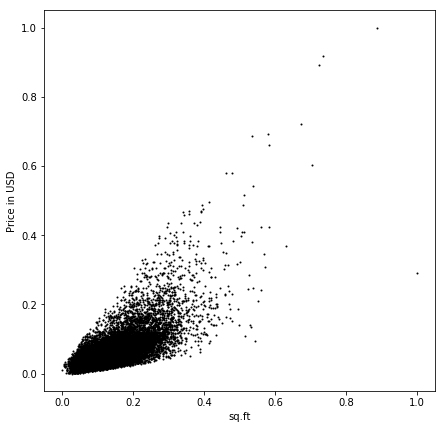

In [17]:
plt.figure(figsize=(7, 7)) # This allows to create a custom size plot
plt.plot(x_scaled, y_scaled, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## 1.2 Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$. 

In [18]:
y = y_scaled
m = y.shape[0]
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), x_scaled], axis=1)

In [24]:
def computeCost(X, y, theta):
    # initialize some useful values
    m = len(y)  # number of training examples
    # You need to return the following variables correctly
    J = 0
    # ====================== YOUR CODE HERE =====================
    predictions = np.dot(X,theta)
    J = np.mean((predictions-y)**2)/2 #could do sum and then divide by m
    # ===========================================================
    return J

In [25]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 1410362.86\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 148909905.31')

With theta = [0, 0] 
Cost computed = 0.00
Expected cost value (approximately) 1410362.86

With theta = [-1, 2]
Cost computed = 0.32
Expected cost value (approximately) 148909905.31


In [36]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    J_history = [] # Use a python list to save cost in every iteration
    J_history.append(computeCost(X, y, theta))
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        prediction = np.dot(X,theta)
        #print(prediction.shape)
        #print(X.shape)
        #print(y.shape)
        theta -= np.mean((prediction-y).reshape(m,1)*X,axis=0)*alpha #alpha=learning rate
        #reshape to 1 bc python broadcasts for us
        #set axis bc x is 2 colms (take mean along axis to get sep value for each col)
        # =====================================================================
        # save the cost J in every iteration   
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

theta = np.zeros(2)
iterations = 20000
alpha = 0.05
theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(theta)

[-0.00429768  0.48336031]


In [38]:
print(theta)
#iterative solution

[-0.00429768  0.48336031]


In [37]:
# TODO: find the pseudo inverse solution
theta_best = np.dot(np.linalg.pinv(X),y)
#explicit solution
print(theta_best)

[-0.00487868  0.48764095]


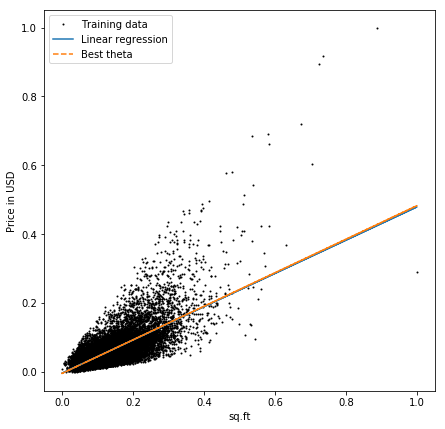

In [40]:
plt.figure(figsize=(7, 7))
plt.plot(X[:,1], y, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.plot(X[:, 1], np.dot(X, theta_best), '--')
plt.legend(['Training data', 'Linear regression', 'Best theta'])
plt.show()

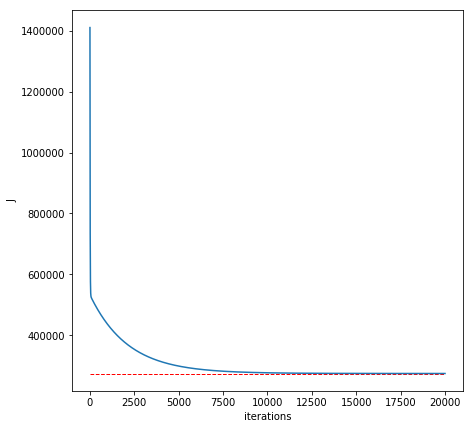

In [41]:
plt.figure(figsize=(7, 7))
plt.plot([i for i in range(len(J_history))], J_history, '-')
plt.hlines(y=computeCost(X, y, theta=theta_best), xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.ylabel('J')
plt.xlabel('iterations')
plt.show()

In [42]:
# comparing the results from the gradient descent and the pseudo inverse solution
J = computeCost(X, y, theta=theta)
print('With the predicted theta\nCost computed = %.2f' % J)

J = computeCost(X, y, theta=theta_best)
print('With the best theta\nCost computed = %.2f' % J)

With the predicted theta
Cost computed = 274599.43
With the best theta
Cost computed = 274578.87


# Part 2: Multivariate Linear Regression

In this part you will implement Linear Regression for more than one feature. <br>
Copy the steps from the simple Linear Regression and update them to match the Multiple Linear Regression.<br>
Think what you need to update in each cell if any.

In [29]:
x = df.drop(columns=['price', 'id', 'date']).values
x_scaled = min_max_scaler(x)

y = df['price'].values
y_scaled = min_max_scaler(y)

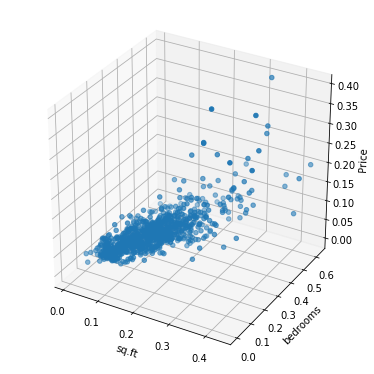

In [30]:
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xs = x_scaled[:, 2][:1000]
ys = x_scaled[:, 1][:1000]
zs = y_scaled[:1000]
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('sq.ft')
ax.set_ylabel('bedrooms')
ax.set_zlabel('Price')
plt.show()

### Question 1
What are the differences between your implementation of the simple linear regression and the multivariate linear regression if any?

**Answer: ** 

### Question 2
Is there a significant difference in the output loss between simple linear regression and the multiple? <br>
What can you say about this observation?

**Answer: ** 